In [8]:
%%configure -f
{
    "conf": {
        "spark.pyspark.python": "python3",
        "spark.pyspark.virtualenv.enabled": "true",
        "spark.pyspark.virtualenv.type":"native",
        "spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv"
    }
}

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,application_1685062346595_0004,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,application_1685062346595_0004,pyspark,idle,Link,Link,✔


In [9]:
sc.list_packages()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version   
-------------------------- ----------
beautifulsoup4             4.9.3     
boto                       2.49.0    
click                      7.1.2     
jmespath                   0.10.0    
joblib                     0.17.0    
lxml                       4.6.1     
mysqlclient                1.4.2     
nltk                       3.5       
nose                       1.3.4     
numpy                      1.16.5    
pip                        9.0.1     
py-dateutil                2.2       
python37-sagemaker-pyspark 1.4.1     
pytz                       2020.1    
PyYAML                     5.3.1     
regex                      2020.10.28
setuptools                 28.8.0    
six                        1.13.0    
tqdm                       4.51.0    
wheel                      0.29.0    
windmill                   1.6

In [10]:
sc.install_pypi_package("boto3==1.19.2")
sc.install_pypi_package("pandas==1.0.5")
sc.install_pypi_package("scipy==1.4.1")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.1")



FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/59/60/163503f24cf09553d0bb6c37db9ff3254f6cda812cab00430602867d03f5/boto3-1.19.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/6a/73/552b27e3a1b4f83630907c4958be78e9d4c906e73efd554ebd5e21cb1692/botocore-1.22.12-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7b/9c/f51775ebe7df5a7aa4e7c79ed671bde94e154bd968aca8d65bb24aba0c8c/s3transfer-0.5.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c5/05/c214b32d21c0b465506f95c4f28ccbcba15022e000b043b72b3df7728471/urllib3-1.26.16-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/af/f3/683bf2547a3eaeec15b39cef86f61e921b3b187f250fcd2b5c5fb4386369/pandas-1.0.5-cp37-cp37m-manylinux1_x86_64.whl

  Using cached https://files.pythonhosted.

In [15]:
import boto3
from pyspark.sql import SparkSession

spark = SparkSession.builder \
.appName("Spark NLP")\
.master("local[*]")\
.config("spark.pyspark.virtualenv.enabled", "true")\
.config("spark.pyspark.virtualenv.type", "native")\
.config("spark.pyspark.virtualenv.bin.path","/usr/bin/virtualenv")\
.getOrCreate()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
data = spark.read.parquet('s3://amazon-reviews-pds/parquet/product_category=Electronics/*.parquet')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
data.columns

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['marketplace', 'customer_id', 'review_id', 'product_id', 'product_parent', 'product_title', 'star_rating', 'helpful_votes', 'total_votes', 'vine', 'verified_purchase', 'review_headline', 'review_body', 'review_date', 'year']

In [18]:
data.groupBy('verified_purchase').count().show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+-------+
|verified_purchase|  count|
+-----------------+-------+
|                Y|2622916|
|                N| 498022|
+-----------------+-------+

# EDA

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pyspark.sql.functions import length
from pyspark.sql.functions import dayofweek, month, year

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
type(data)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pyspark.sql.dataframe.DataFrame'>

In [21]:
reviews_df=data

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Visualization 1: Distribution of Star Ratings
This bar chart will show the distribution of star ratings in the review dataset. This can give us insights into the overall sentiment of the reviews, as higher ratings are usually associated with positive sentiment and vice versa.

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

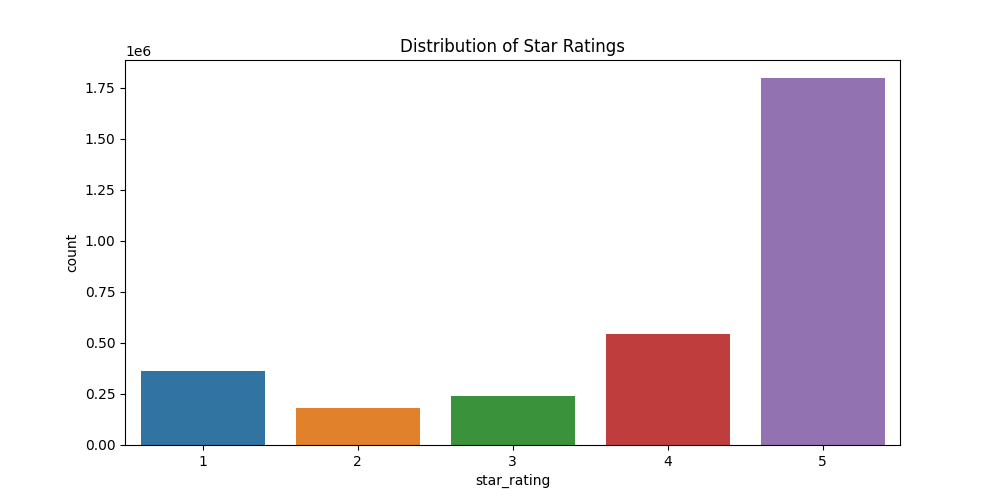

In [22]:
# Convert to pandas dataframe for visualization
star_rating_pandas = reviews_df.select('star_rating').toPandas()

# Plotting
plt.figure(figsize=(10,5))
sns.countplot(x='star_rating', data=star_rating_pandas)
plt.title('Distribution of Star Ratings')
plt.show()
%matplot plt

## Visualization 2: Reviews per Year
This line chart shows the number of reviews over the years. If there's a significant increase or decrease in a specific year, it might be worth investigating further.

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

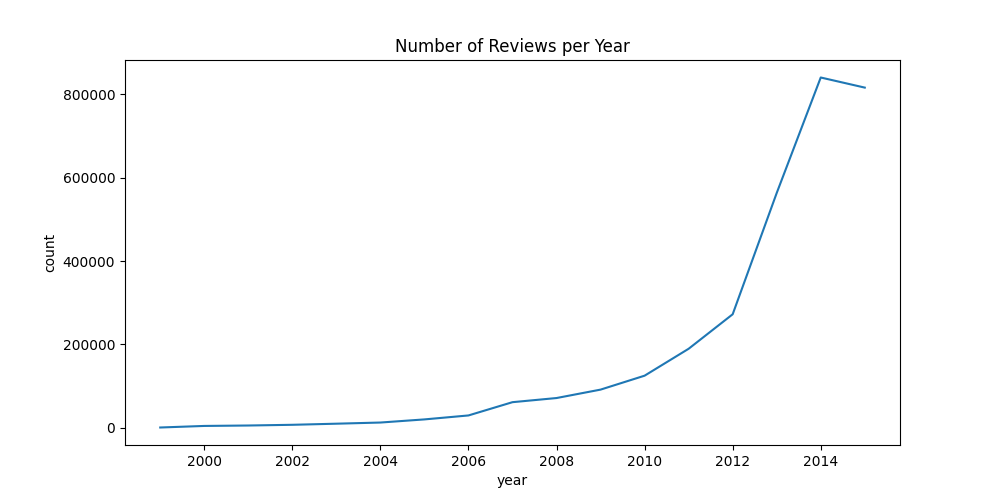

In [23]:
# Group by year
reviews_per_year = reviews_df.groupBy('year').count().toPandas()

# Plotting
plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='count', data=reviews_per_year)
plt.title('Number of Reviews per Year')
plt.show()
%matplot plt

## Visualization 3: Distribution of Review Length
This histogram shows the distribution of review lengths. Reviews that are either extremely short or long might be less genuine.

In [24]:
# Creating a new column for review length
reviews_df = reviews_df.withColumn('review_length', length(reviews_df['review_body']))

# Convert to pandas dataframe for visualization
review_length_pandas = reviews_df.select('review_length').toPandas()

# Plotting
plt.figure(figsize=(10,5))
sns.histplot(review_length_pandas['review_length'], bins=50)
plt.title('Distribution of Review Lengths')
plt.show()
%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
module 'seaborn' has no attribute 'histplot'
Traceback (most recent call last):
AttributeError: module 'seaborn' has no attribute 'histplot'



## Visualization 4: Helpful Votes per Star Rating
This box plot shows how the number of helpful votes varies with the star rating. Reviews with many helpful votes are more likely to be genuine.

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

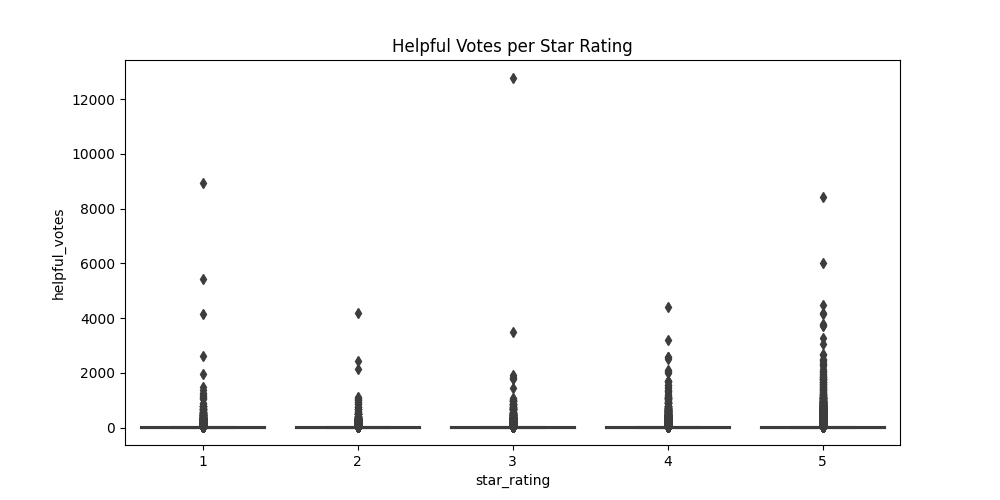

In [25]:
# Convert to pandas dataframe for visualization
helpful_votes_pandas = reviews_df.select('star_rating', 'helpful_votes').toPandas()

# Plotting
plt.figure(figsize=(10,5))
sns.boxplot(x='star_rating', y='helpful_votes', data=helpful_votes_pandas)
plt.title('Helpful Votes per Star Rating')
plt.show()
%matplot plt

## Visualization 5: Verified Purchases vs Non-verified Purchases
This bar chart shows the number of reviews made by verified purchasers vs non-verified purchasers. Reviews from verified purchasers are usually considered more reliable.

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

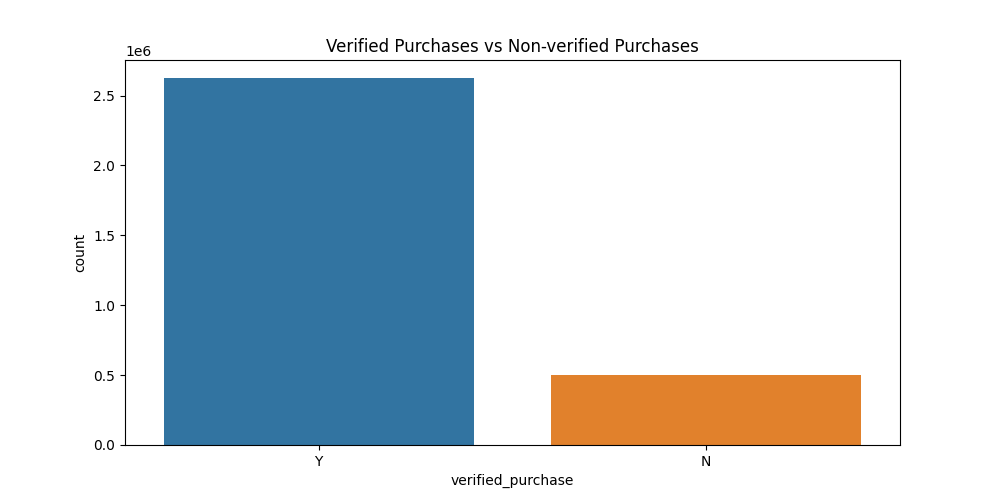

In [26]:
# Convert to pandas dataframe for visualization
verified_purchases_pandas = reviews_df.groupBy('verified_purchase').count().toPandas()

# Plotting
plt.figure(figsize=(10,5))
sns.barplot(x='verified_purchase', y='count', data=verified_purchases_pandas)
plt.title('Verified Purchases vs Non-verified Purchases')
plt.show()
%matplot plt

## Visualization 6: Reviews during Weekdays
This line chart shows the number of reviews made on each day of the week. It could be the case that fake reviews are more often submitted on certain days of the week.

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

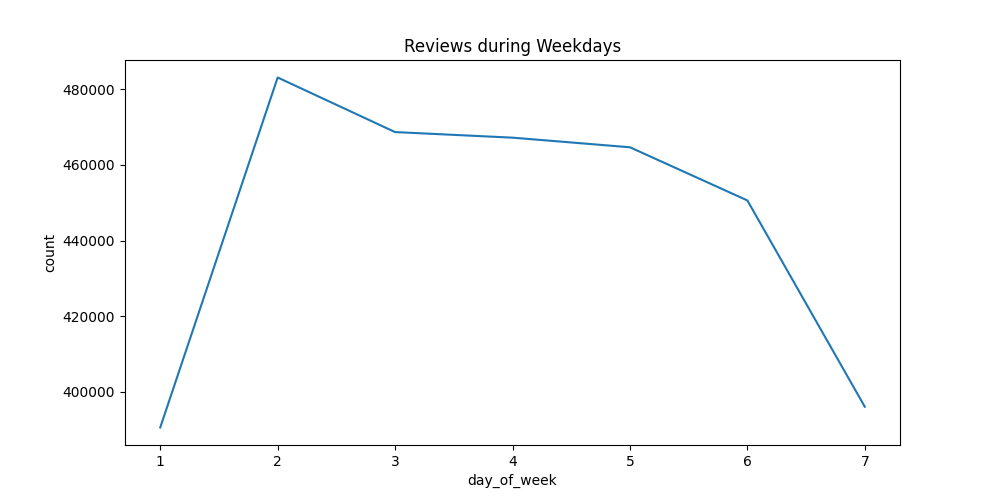

In [27]:
# Creating a new column for day of the week
reviews_df = reviews_df.withColumn('day_of_week', dayofweek(reviews_df['review_date']))

# Convert to pandas dataframe for visualization
reviews_weekdays_pandas = reviews_df.groupBy('day_of_week').count().toPandas()

# Plotting
plt.figure(figsize=(10,5))
sns.lineplot(x='day_of_week', y='count', data=reviews_weekdays_pandas)
plt.title('Reviews during Weekdays')
plt.show()
%matplot plt

## Visualization 7: Reviews during Months
This line chart shows the number of reviews made in each month. This can show us if there's a particular time of year when more reviews are posted.

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

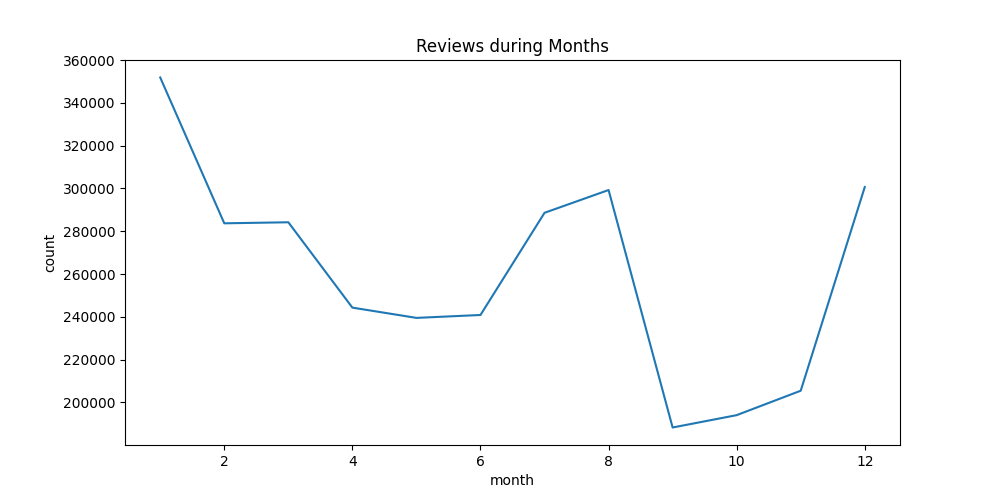

In [28]:
# Creating a new column for month
reviews_df = reviews_df.withColumn('month', month(reviews_df['review_date']))

# Convert to pandas dataframe for visualization
reviews_months_pandas = reviews_df.groupBy('month').count().toPandas()

# Plotting
plt.figure(figsize=(10,5))
sns.lineplot(x='month', y='count', data=reviews_months_pandas)
plt.title('Reviews during Months')
plt.show()
%matplot plt

## Visualization 8: Vine Reviews vs Non-vine Reviews
This bar chart shows the number of Vine reviews versus non-Vine reviews. Vine reviews are those from the Amazon Vine program where reviewers get products for free in exchange for writing a review. It's important to consider this as it could affect the authenticity of the review.

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

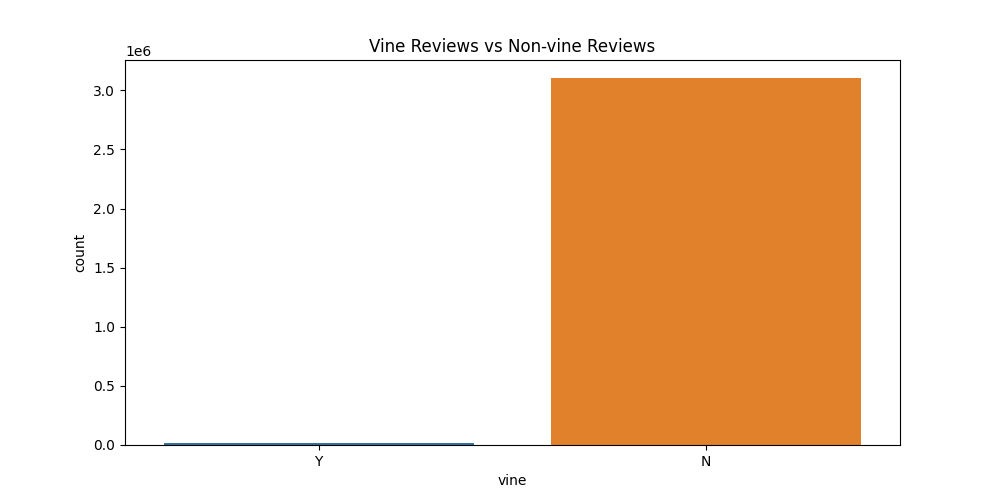

In [29]:
# Convert to pandas dataframe for visualization
vine_reviews_pandas = reviews_df.groupBy('vine').count().toPandas()

# Plotting
plt.figure(figsize=(10,5))
sns.barplot(x='vine', y='count', data=vine_reviews_pandas)
plt.title('Vine Reviews vs Non-vine Reviews')
plt.show()
%matplot plt

## Visualization 9: Distribution of Total Votes
This histogram shows the distribution of total votes per review. This could be an indicator of the review's engagement level, which might help in determining its authenticity.

In [30]:
# Convert to pandas dataframe for visualization
total_votes_pandas = reviews_df.select('total_votes').toPandas()

# Plotting
plt.figure(figsize=(10,5))
sns.histplot(total_votes_pandas['total_votes'], bins=50)
plt.title('Distribution of Total Votes')
plt.show()
%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
module 'seaborn' has no attribute 'histplot'
Traceback (most recent call last):
AttributeError: module 'seaborn' has no attribute 'histplot'



## Visualization 10: Star Rating vs Review Length
This box plot shows the relationship between the star rating and the length of the review. It could be interesting to see if longer reviews correspond to higher or lower ratings. It might also be the case that fake reviews are consistently longer or shorter than genuine reviews.

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

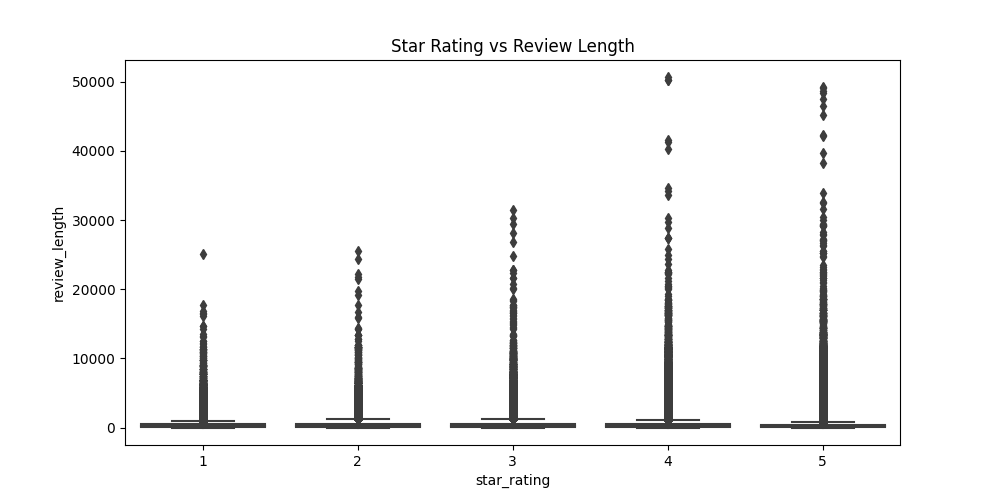

In [31]:
# Convert to pandas dataframe for visualization
star_length_pandas = reviews_df.select('star_rating', 'review_length').toPandas()

# Plotting
plt.figure(figsize=(10,5))
sns.boxplot(x='star_rating', y='review_length', data=star_length_pandas)
plt.title('Star Rating vs Review Length')
plt.show()
%matplot plt